In [ ]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]


In [ ]:
stats = [
         ("Dele", 1, 4, 15,18,5),
         ("Harry Kane", 12, 18, 25,12,23),
         ("Lionel Messi", 45, 32, 40,30,51),
         ("Fabian Schär", 2, 9, 4,12,2),
         ("Kevin De Bruyne", 25, 12, 18,20,16),
         ("Sergio Agüero", 15, 11, 30,32,15),
         ("Cristiano Ronaldo", 40, 42, 38,31,44)
         ]

df = pd.DataFrame(stats, columns=['Name', '2014/2015', '2015/2016', '2016/2017', '2017/2018', '2018/2019'])

In [ ]:
df

,Name,2014/2015,2015/2016,2016/2017,2017/2018,2018/2019
0,Dele,1,4,15,18,5
1,Harry Kane,12,18,25,12,23
2,Lionel Messi,45,32,40,30,51
3,Fabian Schär,2,9,4,12,2
4,Kevin De Bruyne,25,12,18,20,16
5,Sergio Agüero,15,11,30,32,15
6,Cristiano Ronaldo,40,42,38,31,44


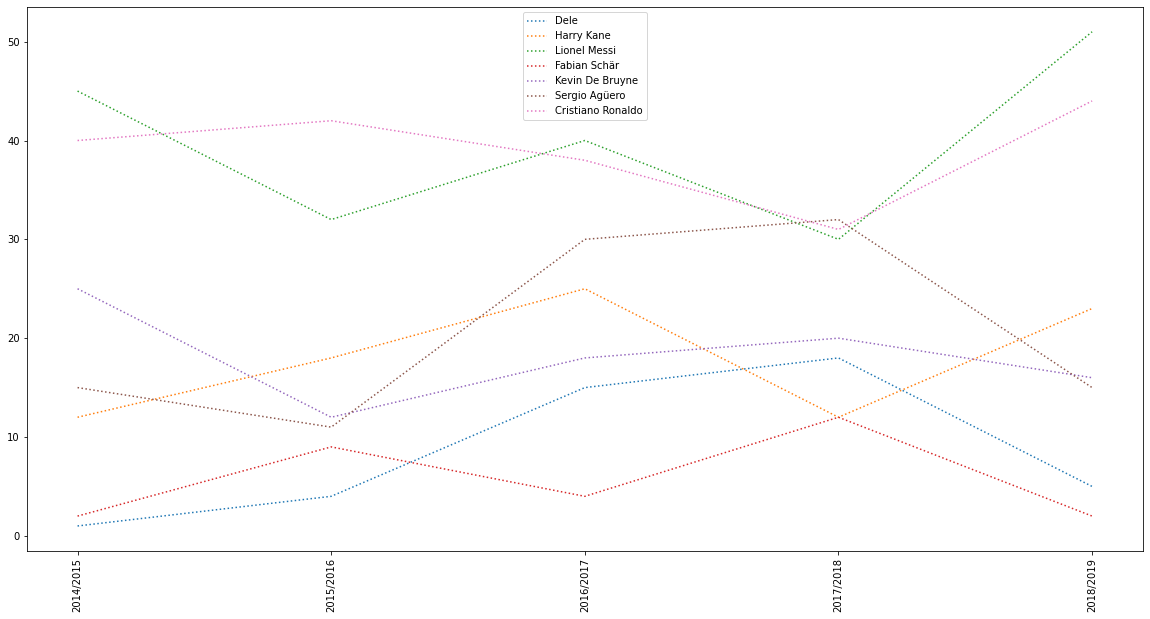

In [ ]:
def task1(df):
  """
  - Plot the data in df as a line chart. There should be seven dotted lines, one for each row of df. So in the end each line represents a player.
  - Set the size of the plot to (20,10)
  - Add a legend to the plot
  - Rotate the x-axis labels by 90 degrees
  """

  # we always need to differentiate between x and y data when creating a plot. So we need to think about what do we want to write on the x-axis labels?
  # and then we need to think about what data we want to show in the plot itself? -> y_data

  # get the x_data
  x_data = list(df.columns)[1:]

  # create
  plt.figure(figsize=(20,10))

  # iterate over all rows in the data frame
  for i in range(len(df)):
    # extract the data we want to plot in the dataframe
    y_data = df.iloc[i, 1:]
    # add the line to the plot, the label is the players name
    plt.plot(x_data, y_data, ':', label=df.iloc[i, 0])

  # add the legend to the plot
  plt.legend()
  
  # get the xaxis element
  xaxis = plt.gca().xaxis
  
  # rotate all x-axis labels by 90 degrees
  for item in xaxis.get_ticklabels():
    item.set_rotation(90)
  
  plt.show()
  
task1(df)

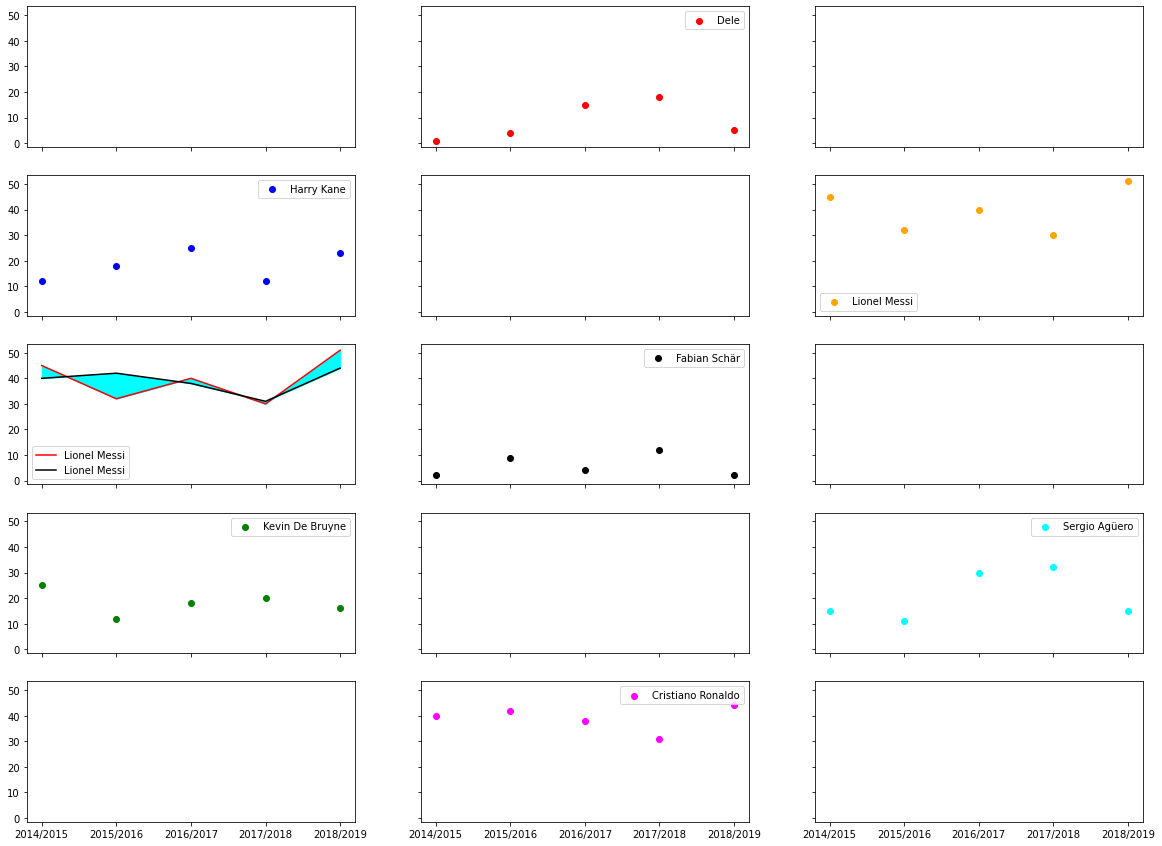

In [ ]:
def task2(df):
  """
  Create a 5x3 grid of plots.

  - Plot each row of df in one of the subplots as a scatterplot. They should share their x and y-axis.

  - Arrange the plots in such a way that they form an X-shape. After finishing you should have a 5x3 grid. For this task your plots should be placed
  where the X are marked here:
    O   X   O
    X   O   X
    O   X   O
    X   O   X
    O   X   O
  The "O" can be empty.

  - Add a legend to each of your plots.

  - Give each plot a different color.

  - set the size of the subplots to  figsize=(20,15)

  - Additionaly, draw the data for Cristiano Ronaldo and Lionel Messi in the sixth fourth subplot as lines
  and fill the area between the lines.
  """

  
  # get the x data
  x_data = list(df.columns)[1:]
  
  # create an empty list so that we can create a list of list with each sub-list representing one subplot / one player
  y_data = []
  
  # create color list
  colors = ['red', 'blue', 'orange', 'black', 'green', 'cyan', 'magenta', 'yellow']

  # iterate over dataframe
  for i in range(len(df)):
    # create sublist
    y = df.iloc[i, 1:].values.tolist()
    # add list to master list
    y_data.append(y)

  ##### complicated way starts here. However: Good Repetition #####
  '''
  # create the empty figure and the empty subplots
  fig, subplots = plt.subplots(5, 3, figsize=(20,15), sharex=True, sharey=True)

  # who even likes numpy arrays when there are lists?
  subplots = subplots.tolist()

  # we need a counter which tells us which player is the next one to add
  i = 0
  # we go through all 5 rows in our 5x3 nested list
  for row in subplots:
    # every row contains three subplots
    for cell in row:
      # O X O: For even index positions, we only want to add a scatter diagram in the middle.
      if subplots.index(row) % 2 == 0:
        # check if the current subplot is the one in the middle
        if row.index(cell) % 2:
          # create the scatter diagram with the i-th player
          cell.scatter(x_data, y_data[i], label = df.iloc[i, 0], color=colors[i])
          cell.legend()
          i += 1
      # X O X: For odd index positions, we want to add a scatter disagram in the first and the third element in the row
      else:
        # check if the current subplot is the first or third one
        if not row.index(cell) % 2:
          # create the scatter diagram with the i-th player
          cell.scatter(x_data, y_data[i], label = df.iloc[i, 0], color=colors[i])
          cell.legend()
          i += 1


  # now add Cristiano Ronaldo and Lionel Messi to the sixth plot as lines
  # first plot in the third row
  subplots[2][0].plot(x_data, y_data[2], label=df.iloc[2, 0]) 
  subplots[2][0].plot(x_data, y_data[6], label=df.iloc[6, 0]) 

  # show the legend
  subplots[2][0].legend()

  # lets connect the two lines
  subplots[2][0].fill_between(range(len(y_data[0])), y_data[2], y_data[6], color="cyan")

  plt.show()

  '''
  '''
  #### easier way ####
  
  fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9), (ax10,a11,ax12), (ax13,ax14,ax15)) = plt.subplots(5, 3,  figsize=(20,15), sharex=True, sharey=True)
  
  ax2.scatter(x_data, y_data[0], label=df.iloc[0, 0], color=colors[0])
  ax2.legend()
  ax4.scatter(x_data, y_data[1], label=df.iloc[1, 0], color=colors[1])
  ax4.legend()
  ax6.scatter(x_data, y_data[2],label=df.iloc[2, 0], color=colors[2])
  ax6.legend()
  ax8.scatter(x_data, y_data[3], label=df.iloc[3, 0], color=colors[3])
  ax8.legend()
  ax10.scatter(x_data, y_data[4], label=df.iloc[4, 0], color=colors[4])
  ax10.legend()
  ax12.scatter(x_data, y_data[5], label=df.iloc[5, 0], color=colors[5])
  ax12.legend()
  ax14.scatter(x_data, y_data[6], label=df.iloc[6, 0], color=colors[6])
  ax14.legend()

  ax7.plot(x_data, y_data[2], label=df.iloc[2, 0], color="red")
  ax7.plot(x_data, y_data[6], label=df.iloc[2, 0], color="black")
  ax7.fill_between(range(len(y_data[2])), y_data[2], y_data[6], color="cyan")
  ax7.legend()
  plt.show()
  '''
task2(df)

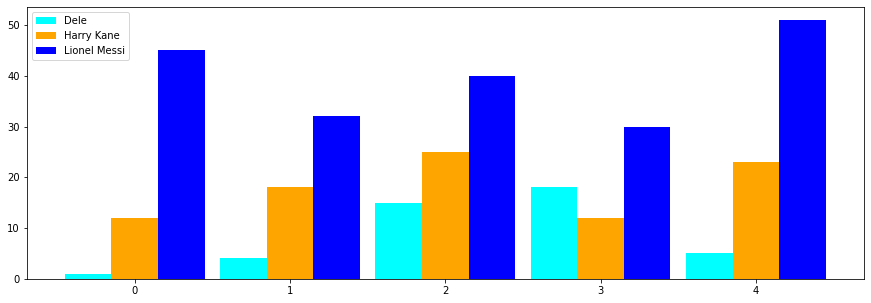

In [ ]:
def task3(df):
  """
  - Draw the data of the first three players of the df as a bar plot.
  - In the end your cahrt should contain a total 15 bars where every 3 bars are grouped together representing a football year
  - set the size of the plot to figsize=(15,5)
  - the bars should appear in the colors cyan, orange and blue
  """

  # as usual: lets extract the y values first
  y_data = df.iloc[0:3, 1:].values.tolist()

  plt.figure(figsize=(15,5))

  # now we have to define for each player where his bars should be located on the x-axis
  xvals1 = [x for x in range(len(y_data[0]))]
  xvals0 = [x-0.3 for x in xvals1]
  xvals2 = [x+0.3 for x in xvals1]

  # add all three bar-groups to the chart
  plt.bar(xvals0, y_data[0], width = 0.3, color='cyan', label=df.iloc[0, 0])
  plt.bar(xvals1, y_data[1], width = 0.3, color='orange', label=df.iloc[1, 0])
  plt.bar(xvals2, y_data[2], width = 0.3, color='blue', label=df.iloc[2, 0])

  plt.legend()

  plt.show()

task3(df)